<a href="https://colab.research.google.com/github/ChinmaySN/customer-insurance-prediction/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Models and scaler saved!

    Model Comparison Table    
        Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
     Logistic  0.871111   0.875000 0.994924  0.931116 0.802121
          Knn  0.940000   0.957606 0.974619  0.966038 0.931268
          Svm  0.924444   0.926540 0.992386  0.958333 0.933738
Decision Tree  0.935556   0.959698 0.967005  0.963338 0.840645
Random Forest  0.928889   0.952500 0.967005  0.959698 0.970880


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


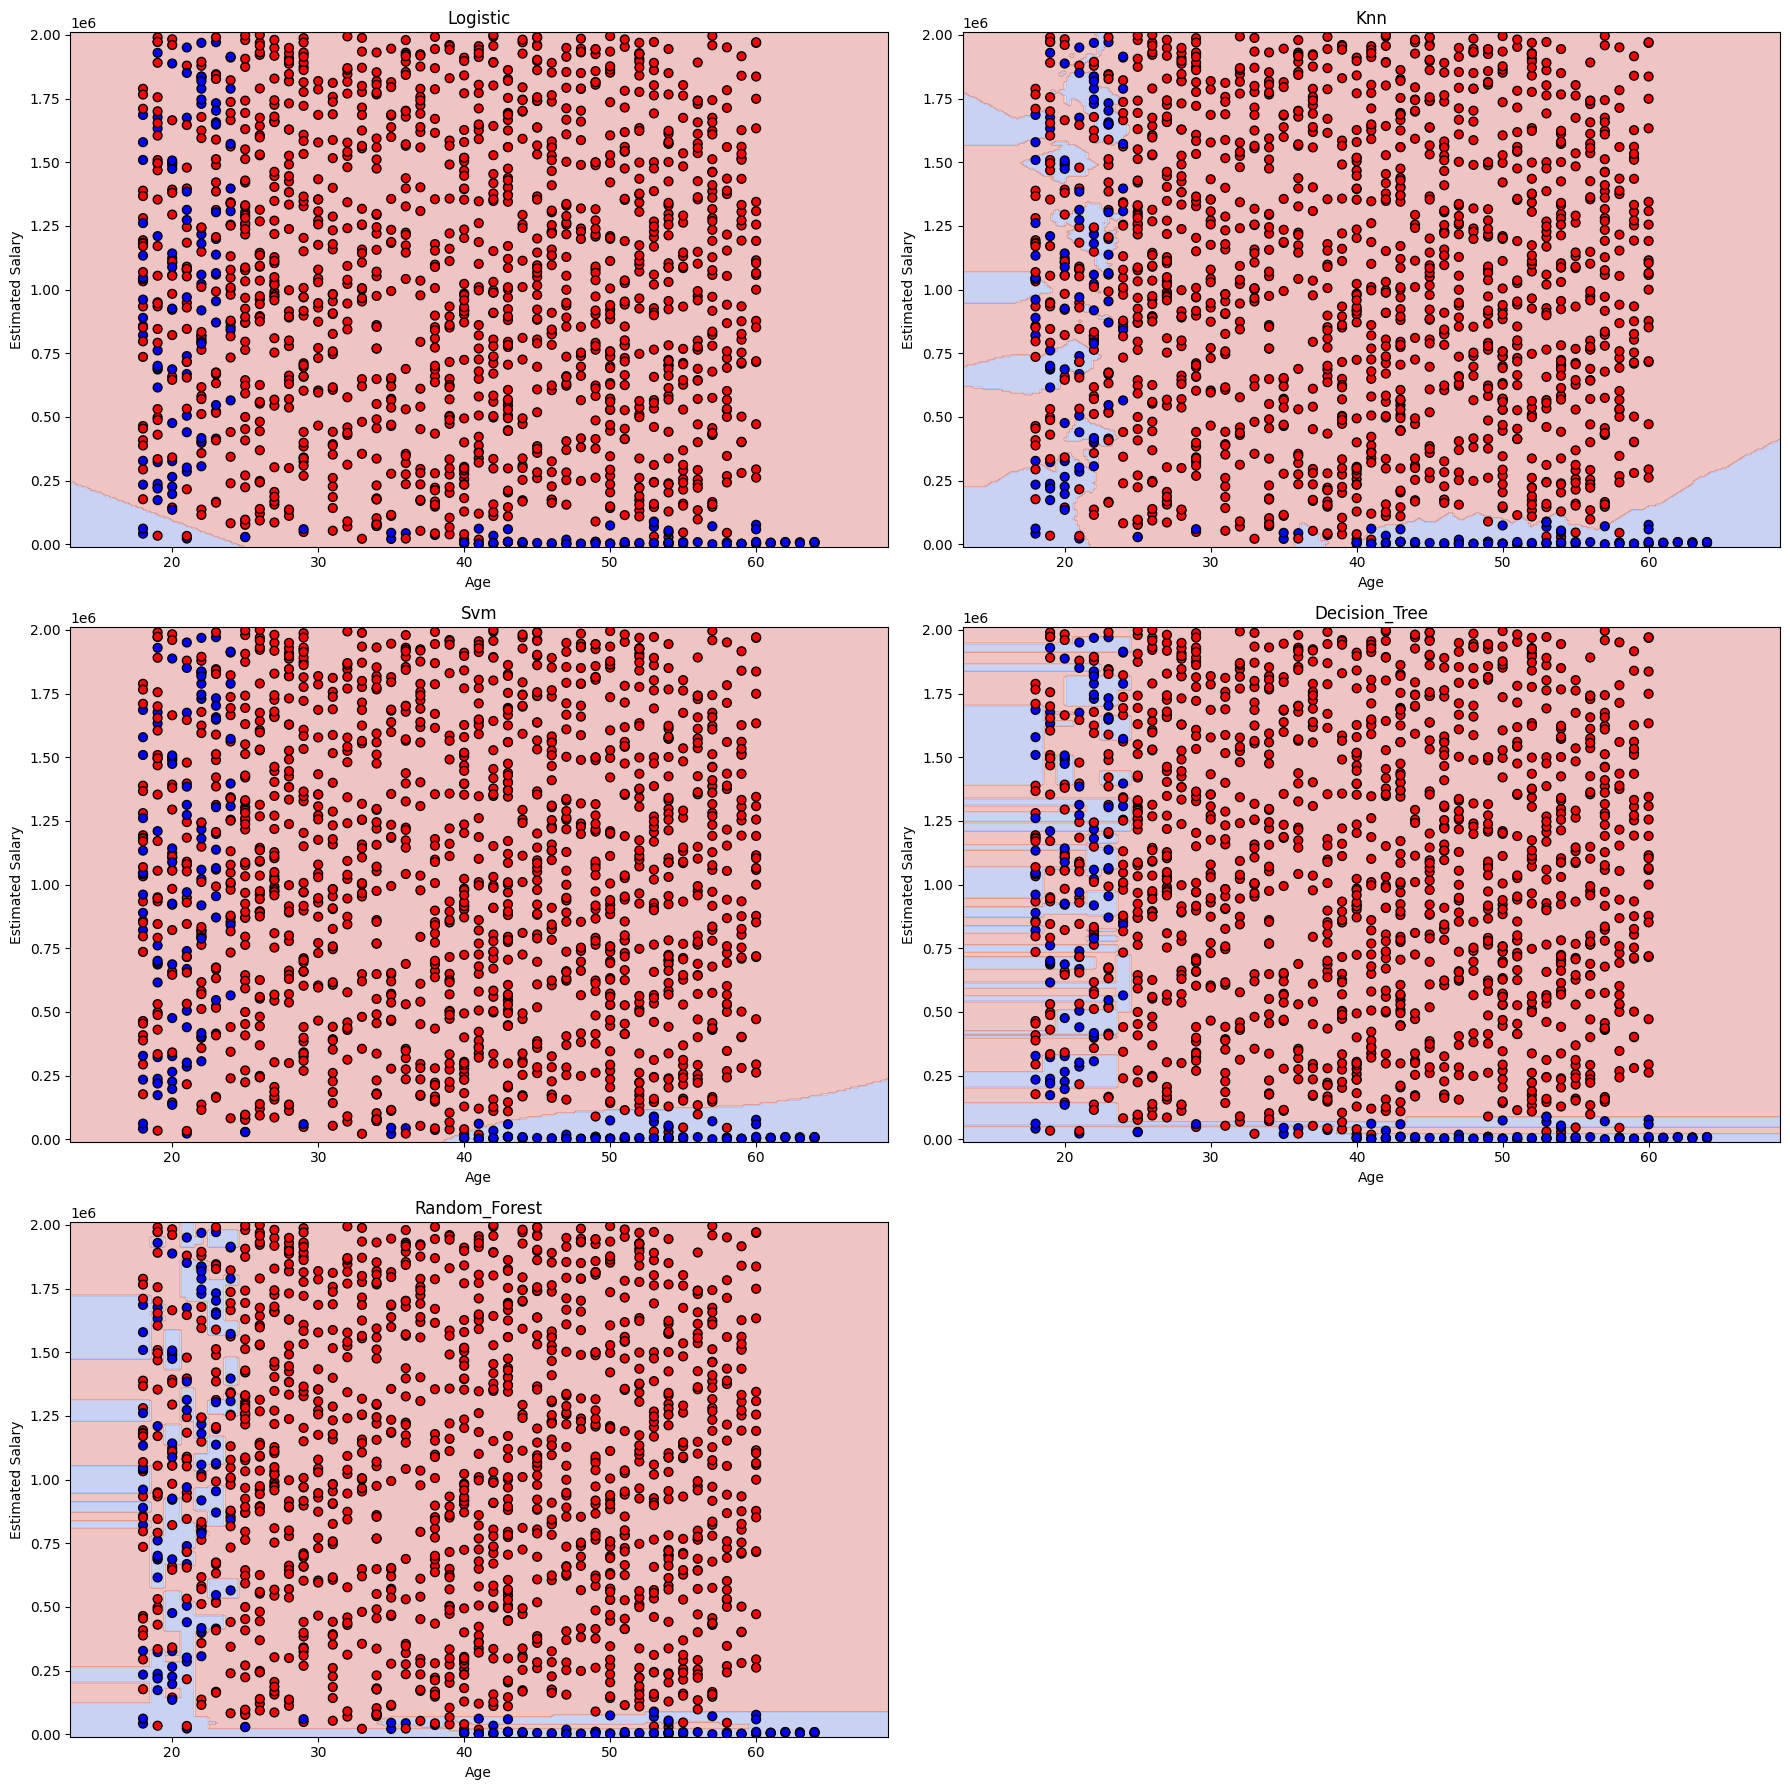

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import joblib

# Load your dataset
data = pd.read_csv("insurance_data.csv")


X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "logistic_model.pkl": LogisticRegression(),
    "knn_model.pkl": KNeighborsClassifier(),
    "svm_model.pkl": SVC(probability=True),
    "decision_tree_model.pkl": DecisionTreeClassifier(),
    "random_forest_model.pkl": RandomForestClassifier()
}

results = []

# Train, save and evaluate models
for filename, model in models.items():
    model.fit(X_train_scaled, y_train)
    joblib.dump(model, filename)

    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    results.append({
        "Model": filename.replace("_model.pkl", "").replace("_", " ").title(),
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
    })

# Save the scaler
joblib.dump(scaler, "scaler.pkl")
print("Models and scaler saved!")

# Show evaluation metrics
results_df = pd.DataFrame(results)
print("\n    Model Comparison Table    ")
print(results_df.to_string(index=False))

#  PLOTTING DECISION BOUNDARIES
def plot_decision_boundary(model, scaler, ax, title):
    age_range = np.linspace(X['Age'].min() - 5, X['Age'].max() + 5, 300)
    salary_range = np.linspace(X['EstimatedSalary'].min() - 10000, X['EstimatedSalary'].max() + 10000, 300)
    xx, yy = np.meshgrid(age_range, salary_range)

    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)
    Z = model.predict(grid_scaled).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    ax.scatter(X['Age'], X['EstimatedSalary'], c=y, edgecolor='k', cmap='bwr', s=40)
    ax.set_title(title)
    ax.set_xlabel("Age")
    ax.set_ylabel("Estimated Salary")

# Plot decision boundaries
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
axes = axes.flatten()

for i, (filename, _) in enumerate(models.items()):
    model_loaded = joblib.load(filename)
    plot_decision_boundary(model_loaded, scaler, axes[i], title=filename.replace("_model.pkl", "").title())

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()
